<a href="https://colab.research.google.com/github/navaneethclt/Mah/blob/master/ARLLSTMIA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sat Dec  9 15:37:33 2023

@author: navan
"""

# -*- coding: utf-8 -*-
"""
Created on Fri Dec  1 14:45:05 2023

@author: navan
"""

from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Dense,BatchNormalization,MaxPooling1D,Flatten,Bidirectional,TimeDistributed
import pandas as pd
import os
import glob
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import numpy as np
import scipy.io
import warnings



import pandas as pd
import os
import glob
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import Callback
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/ARL/TimeS2 -d /content/sample_data &> /dev/null


In [ ]:

fnames = glob.glob('/content/sample_data/TimeS2/25_1/*.csv')



fnames2 = []
i = 0
for f in fnames:
 fnames2.append(os.path.splitext(os.path.split(f)[-1])[-2])
 i = i + 1

operation_condition = [int(s) for s in fnames2 if s.isdigit()]
operation_condition = sorted(operation_condition)
#operation_condition = list(range(46, 91)) + list(range(99, 114))



XData1 = []
XData2 = []
column_names = list(range(23))  # Creates a list of integers from 0 to 22

XData3 = pd.DataFrame()
XData3val= pd.DataFrame()
XData3test= pd.DataFrame()

#data3 = pd.read_excel('/content/sample_data/DLdata/dataLMS/RunTable.xlsx')
path1 ='/content/sample_data/TimeS2/25_1/TimeS/LMS/'
path2 ='/content/sample_data/TimeS2/25_1/TimeS/RMS/'
path3 ='/content/sample_data/TimeS2/25_1/TimeS/D/'
path4 ='/content/sample_data/TimeS2/25_1/'


df1 = pd.DataFrame(columns = ['filenames','class'])
df2 = pd.DataFrame(columns = ['filenames','class'])
df3 = pd.DataFrame(columns = ['filenames','class'])

count2 = 0
count3 = 0
valN = 10
for i  in operation_condition: #len(fnames2)
  filename3 = os.path.join(path4,str(i)+'.csv')
  data3 = pd.read_csv(filename3,header = None)
  if(min(data3.iloc[:,0]-data3.iloc[:,16])>0):

   if(i%valN)==0:

    df2.loc[count2,'filenames'] = filename3
    df2.loc[count2,'class'] = str(i)
    count2 = count2 + 1
    XData3val = pd.concat([XData3val,data3],ignore_index=True,axis=0)
   else:
    df1.loc[count3,'filenames'] = filename3
    df1.loc[count3,'class'] = str(i)
    count3 = count3 + 1
    XData3 = pd.concat([XData3,data3],ignore_index=True,axis=0)






########################################################
fnames = glob.glob('/content/sample_data/TimeS2/30_2/*.csv')



fnames2 = []
i = 0
for f in fnames:
 fnames2.append(os.path.splitext(os.path.split(f)[-1])[-2])
 i = i + 1

operation_condition = [int(s) for s in fnames2 if s.isdigit()]
operation_condition = sorted(operation_condition)
#operation_condition = list(range(46, 91)) + list(range(99, 114))




#data3 = pd.read_excel('/content/sample_data/DLdata/dataLMS/RunTable.xlsx')
path1 ='/content/sample_data/TimeS2/30_2/TimeS/LMS/'
path2 ='/content/sample_data/TimeS2/30_2/TimeS/RMS/'
path3 ='/content/sample_data/TimeS2/30_2/TimeS/D/'
path4 ='/content/sample_data/TimeS2/30_2/'




for i  in operation_condition: #len(fnames2)

  filename3 = os.path.join(path4,str(i)+'.csv')
  data3 = pd.read_csv(filename3,header = None)



  if(min(data3.iloc[:,0]-data3.iloc[:,16])>0):




   if(i%valN)==0:

    df2.loc[count2,'filenames'] = filename3
    df2.loc[count2,'class'] = str(i)
    count2 = count2 + 1
    XData3val = pd.concat([XData3val,data3],ignore_index=True,axis=0)
   else:
    df1.loc[count3,'filenames'] = filename3
    df1.loc[count3,'class'] = str(i)
    count3 = count3 + 1
    XData3 = pd.concat([XData3,data3],ignore_index=True,axis=0)


########################################################
fnames = glob.glob('/content/sample_data/TimeS2/35_1/*.csv')



fnames2 = []
i = 0
for f in fnames:
 fnames2.append(os.path.splitext(os.path.split(f)[-1])[-2])
 i = i + 1

operation_condition = [int(s) for s in fnames2 if s.isdigit()]
operation_condition = sorted(operation_condition)
#operation_condition = list(range(46, 91)) + list(range(99, 114))




#data3 = pd.read_excel('/content/sample_data/DLdata/dataLMS/RunTable.xlsx')
path1 ='/content/sample_data/TimeS2/35_1/TimeS/LMS/'
path2 ='/content/sample_data/TimeS2/35_1/TimeS/RMS/'
path3 ='/content/sample_data/TimeS2/35_1/TimeS/D/'
path4 ='/content/sample_data/TimeS2/35_1/'




for i  in operation_condition: #len(fnames2)

  filename3 = os.path.join(path4,str(i)+'.csv')
  data3 = pd.read_csv(filename3,header = None)
  if(min(data3.iloc[:,0]-data3.iloc[:,16])>0):




   if(i%valN)==0:

    df2.loc[count2,'filenames'] = filename3
    df2.loc[count2,'class'] = str(i)
    count2 = count2 + 1
    XData3val = pd.concat([XData3val,data3],ignore_index=True,axis=0)
   else:
    df1.loc[count3,'filenames'] = filename3
    df1.loc[count3,'class'] = str(i)
    count3 = count3 + 1
    XData3 = pd.concat([XData3,data3],ignore_index=True,axis=0)







########################################################
fnames = glob.glob('/content/sample_data/TimeS2/48_2/*.csv')



fnames2 = []
i = 0
for f in fnames:
 fnames2.append(os.path.splitext(os.path.split(f)[-1])[-2])
 i = i + 1

operation_condition = [int(s) for s in fnames2 if s.isdigit()]
operation_condition = sorted(operation_condition)
#operation_condition = list(range(46, 91)) + list(range(99, 114))




#data3 = pd.read_excel('/content/sample_data/DLdata/dataLMS/RunTable.xlsx')
path1 ='/content/sample_data/TimeS2/48_2/TimeS/LMS/'
path2 ='/content/sample_data/TimeS2/48_2/TimeS/RMS/'
path3 ='/content/sample_data/TimeS2/48_2/TimeS/D/'
path4 ='/content/sample_data/TimeS2/48_2/'




for i  in operation_condition: #len(fnames2)

  filename3 = os.path.join(path4,str(i)+'.csv')
  data3 = pd.read_csv(filename3,header = None)
  if(min(data3.iloc[:,0]-data3.iloc[:,16])>0):




   if(i%valN)==0:

    df2.loc[count2,'filenames'] = filename3
    df2.loc[count2,'class'] = str(i)
    count2 = count2 + 1
    XData3val = pd.concat([XData3val,data3],ignore_index=True,axis=0)
   else:
    df1.loc[count3,'filenames'] = filename3
    df1.loc[count3,'class'] = str(i)
    count3 = count3 + 1
    XData3 = pd.concat([XData3,data3],ignore_index=True,axis=0)


####################################################################
####################################################################

fnames = glob.glob('/content/sample_data/TimeS2/30_1/*.csv')



fnames2 = []
i = 0
for f in fnames:
 fnames2.append(os.path.splitext(os.path.split(f)[-1])[-2])
 i = i + 1

operation_condition = [int(s) for s in fnames2 if s.isdigit()]
operation_condition = sorted(operation_condition)
#operation_condition = list(range(46, 91)) + list(range(99, 114))





#data3 = pd.read_excel('/content/sample_data/DLdata/dataLMS/RunTable.xlsx')
path1 ='/content/sample_data/TimeS2/30_1/TimeS/LMS/'
path2 ='/content/sample_data/TimeS2/30_1/TimeS/RMS/'
path3 ='/content/sample_data/TimeS2/30_1/TimeS/D/'
path4 ='/content/sample_data/TimeS2/30_1/'




count1 = 0
for i  in operation_condition: #len(fnames2)

  filename3 = os.path.join(path4,str(i)+'.csv')
  data3 = pd.read_csv(filename3,header = None)
  if(min(data3.iloc[:,0]-data3.iloc[:,16])>0):





   df3.loc[count1,'filenames'] = filename3
   df3.loc[count1,'class'] = str(i)
   count1 = count1 + 1
   XData3test = pd.concat([XData3test,data3],ignore_index=True,axis=0)






########################################################
fnames = glob.glob('/content/sample_data/TimeS2/48_1/*.csv')



fnames2 = []
i = 0
for f in fnames:
 fnames2.append(os.path.splitext(os.path.split(f)[-1])[-2])
 i = i + 1

operation_condition = [int(s) for s in fnames2 if s.isdigit()]
operation_condition = sorted(operation_condition)
#operation_condition = list(range(46, 91)) + list(range(99, 114))





#data3 = pd.read_excel('/content/sample_data/DLdata/dataLMS/RunTable.xlsx')
path1 ='/content/sample_data/TimeS2/48_1/TimeS/LMS/'
path2 ='/content/sample_data/TimeS2/48_1/TimeS/RMS/'
path3 ='/content/sample_data/TimeS2/48_1/TimeS/D/'
path4 ='/content/sample_data/TimeS2/48_1/'




for i  in operation_condition: #len(fnames2)

  filename3 = os.path.join(path4,str(i)+'.csv')
  data3 = pd.read_csv(filename3,header = None)
  if(min(data3.iloc[:,0]-data3.iloc[:,16])>0):





    df3.loc[count1,'filenames'] = filename3
    df3.loc[count1,'class'] = str(i)
    count1 = count1 + 1
    XData3test = pd.concat([XData3test,data3],ignore_index=True,axis=0)

###############################################################################
###############################################################################
YData = XData3.iloc[:,0]-XData3.iloc[:,16]
YDatatest = XData3test.iloc[:,0]-XData3test.iloc[:,16]
YDataval = XData3val.iloc[:,0]-XData3val.iloc[:,16]

X_Trainnum = XData3.iloc[:,16]
X_valnum = XData3val.iloc[:,16]
X_Testnum = XData3test.iloc[:,16]

###############################################################################
###############################################################################


In [ ]:


num_samples = len(df1)
indices = np.arange(num_samples)


      # Initialize empty arrays to store batch data
batch_LMS = pd.DataFrame()
batch_RMS = pd.DataFrame()
batch_CD = pd.DataFrame()

for idx in indices:
          # Load and preprocess the images
          fpath1 = os.path.split(df1.iloc[idx]['filenames'])[-2] + '/TimeS/LMS/' + df1.iloc[idx]['class'] + '.csv'
          fpath2 = os.path.split(df1.iloc[idx]['filenames'])[-2] + '/TimeS/RMS/' + df1.iloc[idx]['class'] + '.csv'
          fpath3 = os.path.split(df1.iloc[idx]['filenames'])[-2] + '/TimeS/D/' + df1.iloc[idx]['class'] + '.csv'

          data1 = pd.read_csv(fpath1,header=None)
          data2 = pd.read_csv(fpath2,header=None)
          data3 = pd.read_csv(fpath3,header=None)/100
        #  data1 = data1/np.max(data1,axis = 0)
        #  data2 = data2/np.max(data2,axis = 0)






          batch_LMS = pd.concat([batch_LMS,data1],ignore_index=True,axis = 1)
          batch_RMS = pd.concat([batch_RMS,data2],axis = 1)
          batch_CD = pd.concat([batch_CD,data3],axis = 1)

batch_LMS = np.array(batch_LMS.T)
batch_RMS = np.array(batch_RMS.T)
batch_CD = np.array(batch_CD.T)

X_Train = np.stack((batch_LMS, batch_RMS, batch_CD), axis=2)

num_samples = len(df2)
indices = np.arange(num_samples)


      # Initialize empty arrays to store batch data
batch_LMS = pd.DataFrame()
batch_RMS = pd.DataFrame()
batch_CD = pd.DataFrame()

for idx in indices:
          # Load and preprocess the images
          fpath1 = os.path.split(df2.iloc[idx]['filenames'])[-2] + '/TimeS/LMS/' + df2.iloc[idx]['class'] + '.csv'
          fpath2 = os.path.split(df2.iloc[idx]['filenames'])[-2] + '/TimeS/RMS/' + df2.iloc[idx]['class'] + '.csv'
          fpath3 = os.path.split(df2.iloc[idx]['filenames'])[-2] + '/TimeS/D/' + df2.iloc[idx]['class'] + '.csv'

          data1 = pd.read_csv(fpath1,header=None)
          data2 = pd.read_csv(fpath2,header=None)
          data3 = pd.read_csv(fpath3,header=None)/100
          #data1 = data1/np.max(data1,axis = 0)
          #data2 = data2/np.max(data2,axis = 0)






          batch_LMS = pd.concat([batch_LMS,data1],ignore_index=True,axis = 1)
          batch_RMS = pd.concat([batch_RMS,data2],axis = 1)
          batch_CD = pd.concat([batch_CD,data3],axis = 1)

batch_LMS = np.array(batch_LMS.T)
batch_RMS = np.array(batch_RMS.T)
batch_CD = np.array(batch_CD.T)

X_val = np.stack((batch_LMS, batch_RMS, batch_CD), axis=2)

num_samples = len(df3)
indices = np.arange(num_samples)


      # Initialize empty arrays to store batch data
batch_LMS = pd.DataFrame()
batch_RMS = pd.DataFrame()
batch_CD = pd.DataFrame()

for idx in indices:
          # Load and preprocess the images
          fpath1 = os.path.split(df3.iloc[idx]['filenames'])[-2] + '/TimeS/LMS/' + df3.iloc[idx]['class'] + '.csv'
          fpath2 = os.path.split(df3.iloc[idx]['filenames'])[-2] + '/TimeS/RMS/' + df3.iloc[idx]['class'] + '.csv'
          fpath3 = os.path.split(df3.iloc[idx]['filenames'])[-2] + '/TimeS/D/' + df3.iloc[idx]['class'] + '.csv'

          data1 = pd.read_csv(fpath1,header=None)
          data2 = pd.read_csv(fpath2,header=None)
          data3 = pd.read_csv(fpath3,header=None)/100
         # data1 = data1/np.max(data1,axis = 0)
          #data2 = data2/np.max(data2,axis = 0)






          batch_LMS = pd.concat([batch_LMS,data1],ignore_index=True,axis = 1)
          batch_RMS = pd.concat([batch_RMS,data2],axis = 1)
          batch_CD = pd.concat([batch_CD,data3],axis = 1)

batch_LMS = np.array(batch_LMS.T)
batch_RMS = np.array(batch_RMS.T)
batch_CD = np.array(batch_CD.T)

X_Test = np.stack((batch_LMS, batch_RMS, batch_CD), axis=2)



import numpy as np
from scipy.interpolate import interp1d

# Assuming your original matrix is named 'original_matrix'
# and it has dimensions n x 1510 x 3

# Create a sample matrix with dimensions n x 1510 x 3
def interp_data(data,new_columns):


  original_matrix = data


# Create linear interpolation functions for each channel (3 channels)
  interpolated_channels = [interp1d(np.arange(data.shape[1]), original_matrix[:, :, i], kind='linear', axis=1, fill_value="extrapolate") for i in range(3)]

# Define the new number of columns (500)

# Interpolate each channel to get the new matrix with dimensions n x 500 x 3

  interpolated_matrix = np.stack([interp(np.linspace(0, 1509, new_columns)) for interp in interpolated_channels], axis=-1)
  return interpolated_matrix
# 'interpolated_matrix' now has dimensions n x 500 x 3



X_Train2 = X_Train[:,0:1000,:]
X_Test2 = X_Test[:,0:1000,:]
X_val2 = X_val[:,0:1000,:]


X_Train3 = interp_data(X_Train2,500)
X_Test3 = interp_data(X_Test2,500)
X_val3 = interp_data(X_val2,500)


In [ ]:
np.shape(X_Train)

(18721, 1510, 3)

In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, Sequential

# 1D ResNet Block
class ResidualBlock1D(tf.keras.layers.Layer):
    def __init__(self, filters, kernel_size, strides=1, padding='same'):
        super(ResidualBlock1D, self).__init__()

        self.conv1 = layers.Conv1D(filters, kernel_size, strides=strides, padding=padding)
        self.bn1 = layers.BatchNormalization()
        self.relu = layers.ReLU()

        self.conv2 = layers.Conv1D(filters, kernel_size, strides=strides, padding=padding)
        self.bn2 = layers.BatchNormalization()

        self.shortcut = layers.Conv1D(filters, kernel_size=1, strides=strides, padding='same')
        self.shortcut_bn = layers.BatchNormalization()

    def call(self, inputs, training=False):
        x = self.conv1(inputs)
        x = self.bn1(x, training=training)
        x = self.relu(x)

        x = self.conv2(x)
        x = self.bn2(x, training=training)

        shortcut = self.shortcut(inputs)
        shortcut = self.shortcut_bn(shortcut, training=training)

        x += shortcut
        x = self.relu(x)

        return x

# 1D ResNet Model
class ResNet1D(tf.keras.Model):
    def __init__(self, input_shape, num_blocks=1, filters=64):
        super(ResNet1D, self).__init__()

        self.in_channels = filters

        self.conv1 = layers.Conv1D(self.in_channels, kernel_size=3, strides=2, padding='same', input_shape=input_shape)
        self.bn1 = layers.BatchNormalization()
        self.relu = layers.ReLU()

        self.res_blocks = [ResidualBlock1D(filters, kernel_size=3) for _ in range(num_blocks)]

    def call(self, inputs, training=False):
        x = self.conv1(inputs)
        x = self.bn1(x, training=training)
        x = self.relu(x)

        for block in self.res_blocks:
            x = block(x, training=training)

        return x

# Numeric Input Model
class NumericModel(tf.keras.Model):
    def __init__(self, num_numeric_features):
        super(NumericModel, self).__init__()

        self.dense2 = layers.Dense(2, activation='relu')

    def call(self, inputs, training=False):
        x = self.dense2(inputs)
        return x

# Combined Model with LSTM
class CombinedModelWithLSTM(tf.keras.Model):
    def __init__(self, input_shape_time_series, num_numeric_features):
        super(CombinedModelWithLSTM, self).__init__()

        self.resnet = ResNet1D(input_shape_time_series)
        self.numeric_model = NumericModel(num_numeric_features)

        # Adjust the number of units in the dense layer to match the ResNet output

        # Concatenate the output of the ResNet and Numeric branches
        self.lstm = layers.Bidirectional(layers.LSTM(2))  # You can adjust the number of LSTM units
        self.concat = layers.Concatenate()
        self.dense = layers.Dense(2, activation='relu')  # For regression


        self.output_layer = layers.Dense(1, activation='linear')  # For regression

    def call(self, inputs, training=False):
        time_series_data, numeric_data = inputs

        # Process time series data through ResNet branch
        x_time_series = self.resnet(time_series_data, training=training)

        # Process numeric data through Numeric branch
        x_numeric = self.numeric_model(numeric_data, training=training)


        # Process the  features through LSTM layer
        x = self.lstm(x_time_series)  # LSTM expects 3D input, add an extra dimension

        # Concatenate the outputs of both branches
        x = self.concat([x, x_numeric])

        x = self.dense(x)



        # Output layer
        output = self.output_layer(x)

        return output



In [ ]:

# Example usage
sequence_length = 500  # Adjust according to your data
num_variables = 3  # Adjust according to your data
num_numeric_features = 1  # Adjust according to your data

input_shape_time_series = (sequence_length, num_variables)
input_shape_numeric = (num_numeric_features,)

combined_model = CombinedModelWithLSTM(input_shape_time_series, num_numeric_features)

# Compile the model for regression
combined_model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])



# Define ModelCheckpoint callback to save the model weights
checkpoint_callback = ModelCheckpoint(filepath='lstm_IA_fi_2.h5',
                                      monitor='val_loss',
                                      save_best_only=True,
                                      save_weights_only=True,
                                      mode='min',  # or 'max' depending on your metric
                                      verbose=1)

# Train the model with your data and use the ModelCheckpoint callback
# Assuming you have 'train_data', 'train_labels', 'val_data', and 'val_labels'


# After training, you can load the best weights using the following:
combined_model.fit([X_Train3, X_Trainnum], YData.values,
                             epochs=10000,
                             validation_data=([X_val3, X_valnum], YDataval.values),callbacks=[checkpoint_callback],batch_size=100,shuffle=True)

y_pred = combined_model.predict([X_Test3,X_Testnum])
np.sum(np.square(YDatatest.values - y_pred.flatten()))/len(y_pred)

model2 = CombinedModelWithLSTM(input_shape_time_series=(input_shape_time_series), num_numeric_features=(num_numeric_features))
dummy_input = (tf.zeros((1,) + input_shape_time_series), tf.zeros((1, num_numeric_features)))
model2(dummy_input)

# Load the weights

model2.load_weights('lstm_IA_fi_3.h5')


y_pred = model2.predict([X_Test3,X_Testnum])
np.sum(np.square(YDatatest.values - y_pred.flatten()))/len(y_pred)


plt.grid( which='major', color='k', linestyle='--')
plt.grid(which='minor', color='r', linestyle='-', alpha=0.2)
plt.plot(YDatatest.values)
plt.plot(y_pred)
plt.minorticks_on()
plt.xlabel("Cycles")
plt.ylabel("CA50-Inj")
plt.legend(['actual','predicted'])






plt.subplot(2,1,1)
plt.grid( which='major', color='k', linestyle='--')
plt.grid(which='minor', color='r', linestyle='-', alpha=0.2)
plt.plot((np.abs(YDatatest.values - y_pred.flatten())))
plt.plot((np.abs(YDatatest.values - y_pred.flatten())),'+')
plt.axhline(y=1, color='red', linestyle='--', label='y=5')

plt.ylabel("Error(degree)")
plt.xlabel("Cycles")

plt.subplot(2,1,2)
plt.grid( which='major', color='k', linestyle='--')
plt.grid(which='minor', color='r', linestyle='-', alpha=0.2)
plt.plot((np.abs(YDatatest.values - y_pred.flatten()))*100/np.abs(YDatatest.values))
plt.plot((np.abs(YDatatest.values - y_pred.flatten()))*100/np.abs(YDatatest.values),'+')
plt.axhline(y=5, color='red', linestyle='--', label='y=5')

plt.ylabel("Error %")
plt.xlabel("Cycles")


# Calculate RMSE for every 9 samples
window_size = 97
window_size2 = 7760/97

rmse_list = []

for i in range(0, len(y_pred), window_size):
    # Extract a window of 9 samples
    window = y_pred[i:i + window_size]
    value =  YDatatest[i:i + window_size]
    # Calculate the RMSE for the window
    rmse = sqrt(mean_squared_error(window,value))
    rmse_list.append(rmse)

# Print the RMSE values for each window
for i, rmse in enumerate(rmse_list):
    print(f"RMSE for samples {i * window_size + 1}-{(i + 1) * window_size}: {rmse}")
plt.plot(np.arange(1,window_size2+1),rmse_list)
plt.scatter(np.arange(1,window_size2+1),rmse_list)

plt.xlabel("Operating Conditions")
plt.ylabel("RMSE(deg)")

plt.figure()

plt.subplot(3,1,1)
plt.plot(YDatatest)
plt.minorticks_on()
plt.xlabel("Cycles")
plt.ylabel("CA50-Inj(deg)")
plt.legend(['actual'])


plt.subplot(3,1,2)
plt.plot(YDatatest)
plt.plot(y_pred)
plt.minorticks_on()
plt.xlabel("Cycles")
plt.ylabel("CA50-Inj(deg)")
plt.legend(['actual','predicted'])


plt.subplot(3,1,3)
plt.plot(np.arange(1,window_size2+1),rmse_list)
plt.scatter(np.arange(1,window_size2+1),rmse_list)
plt.axhline(y=1, color='red', linestyle='--', label='y=5')

plt.xlabel("Operating Conditions")
plt.ylabel("RMSE(deg)")


Streaming output truncated to the last 5000 lines.
188/188 [==============================] - 4s 22ms/step - loss: 0.8174 - mean_absolute_error: 0.5215 - val_loss: 4.8875 - val_mean_absolute_error: 1.0760
Epoch 2832/10000
187/188 [============================>.] - ETA: 0s - loss: 0.6869 - mean_absolute_error: 0.4836
Epoch 2832: val_loss did not improve from 3.88748
188/188 [==============================] - 4s 22ms/step - loss: 0.6879 - mean_absolute_error: 0.4841 - val_loss: 4.9013 - val_mean_absolute_error: 1.1482
Epoch 2833/10000
187/188 [============================>.] - ETA: 0s - loss: 0.6709 - mean_absolute_error: 0.4824
Epoch 2833: val_loss did not improve from 3.88748
188/188 [==============================] - 4s 22ms/step - loss: 0.6713 - mean_absolute_error: 0.4826 - val_loss: 5.0273 - val_mean_absolute_error: 1.0459
Epoch 2834/10000
188/188 [==============================] - ETA: 0s - loss: 0.7117 - mean_absolute_error: 0.4967
Epoch 2834: val_loss did not improve from 3.8874

KeyboardInterrupt: ignored

In [ ]:

path1 ='/content/sample_data/TimeS/TimeS301LMS/'
path2 ='/content/sample_data/TimeS/TimeS301RMS/'
path3 ='/content/sample_data/TimeS/TimeS301D/'
path4 ='/content/sample_data/TimeS/CA5301/'

fnames = glob.glob(path1+'*.csv')



fnames2 = []
i = 0
for f in fnames:
 fnames2.append(os.path.splitext(os.path.split(f)[-1])[-2])
 i = i + 1

operation_condition = [int(s) for s in fnames2 if s.isdigit()]
operation_condition = sorted(operation_condition)
#operation_condition = list(range(46, 91)) + list(range(99, 114))





#data3 = pd.read_excel('/content/sample_data/DLdata/dataLMS/RunTable.xlsx')




count1 = 0
for i  in operation_condition: #len(fnames2)

  filename3 = os.path.join(path1,str(i)+'.csv')
  data3 = pd.read_csv(filename3,header = None)
  if(min(data3.iloc[:,0]-data3.iloc[:,16])>casoid):





   df3.loc[count1,'filenames'] = filename3
   df3.loc[count1,'class'] = str(i)
   count1 = count1 + 1
   XData3test = pd.concat([XData3test,data3],ignore_index=True,axis=0)






########################################################

path1 ='/content/sample_data/TimeS/TimeS481/LMS/'
path2 ='/content/sample_data/TimeS/TimeS481/RMS/'
path3 ='/content/sample_data/TimeS/TimeS481/D/'
path4 ='/content/sample_data/TimeS/CA50481/'

fnames = glob.glob(path1+'*.csv')



fnames2 = []
i = 0
for f in fnames:
 fnames2.append(os.path.splitext(os.path.split(f)[-1])[-2])
 i = i + 1

operation_condition = [int(s) for s in fnames2 if s.isdigit()]
operation_condition = sorted(operation_condition)
#operation_condition = list(range(46, 91)) + list(range(99, 114))





#data3 = pd.read_excel('/content/sample_data/DLdata/dataLMS/RunTable.xlsx')





for i  in operation_condition: #len(fnames2)

  filename3 = os.path.join(path1,str(i)+'.csv')
  data3 = pd.read_csv(filename3,header = None)
  if(min(data3.iloc[:,0]-data3.iloc[:,16])>casoid):





    df3.loc[count1,'filenames'] = filename3
    df3.loc[count1,'class'] = str(i)
    count1 = count1 + 1
    XData3test = pd.concat([XData3test,data3],ignore_index=True,axis=0)

###############################################################################
###############################################################################
YData = XData3.iloc[:,0]-XData3.iloc[:,16]
YDatatest = XData3test.iloc[:,0]-XData3test.iloc[:,16]
YDataval = XData3val.iloc[:,0]-XData3val.iloc[:,16]

X_Trainnum = XData3.iloc[:,16]
X_valnum = XData3val.iloc[:,16]
X_Testnum = XData3test.iloc[:,16]

###############################################################################
###############################################################################


IndexError: ignored

In [ ]:
XData3.head()

""


In [ ]:

num_samples = len(df1)
indices = np.arange(num_samples)


      # Initialize empty arrays to store batch data
batch_LMS = pd.DataFrame()
batch_RMS = pd.DataFrame()
batch_CD = pd.DataFrame()

for idx in indices:
          # Load and preprocess the images
          fpath1 = os.path.split(df1.iloc[idx]['filenames'])[-2] + '/LMS/' + df1.iloc[idx]['class'] + '.csv'
          fpath2 = os.path.split(df1.iloc[idx]['filenames'])[-2] + '/RMS/' + df1.iloc[idx]['class'] + '.csv'
          fpath3 = os.path.split(df1.iloc[idx]['filenames'])[-2] + '/D/' + df1.iloc[idx]['class'] + '.csv'

          data1 = pd.read_csv(fpath1,header=None)
          data2 = pd.read_csv(fpath2,header=None)
          data3 = pd.read_csv(fpath3,header=None)/100
        #  data1 = data1/np.max(data1,axis = 0)
        #  data2 = data2/np.max(data2,axis = 0)






          batch_LMS = pd.concat([batch_LMS,data1],ignore_index=True,axis = 1)
          batch_RMS = pd.concat([batch_RMS,data2],axis = 1)
          batch_CD = pd.concat([batch_CD,data3],axis = 1)

batch_LMS = np.array(batch_LMS.T)
batch_RMS = np.array(batch_RMS.T)
batch_CD = np.array(batch_CD.T)

X_Train = np.stack((batch_LMS, batch_RMS, batch_CD), axis=2)

num_samples = len(df2)
indices = np.arange(num_samples)


      # Initialize empty arrays to store batch data
batch_LMS = pd.DataFrame()
batch_RMS = pd.DataFrame()
batch_CD = pd.DataFrame()

for idx in indices:
          # Load and preprocess the images
          fpath1 = os.path.split(df2.iloc[idx]['filenames'])[-2] + '/LMS/' + df2.iloc[idx]['class'] + '.csv'
          fpath2 = os.path.split(df2.iloc[idx]['filenames'])[-2] + '/RMS/' + df2.iloc[idx]['class'] + '.csv'
          fpath3 = os.path.split(df2.iloc[idx]['filenames'])[-2] + '/D/' + df2.iloc[idx]['class'] + '.csv'

          data1 = pd.read_csv(fpath1,header=None)
          data2 = pd.read_csv(fpath2,header=None)
          data3 = pd.read_csv(fpath3,header=None)/100
          #data1 = data1/np.max(data1,axis = 0)
          #data2 = data2/np.max(data2,axis = 0)






          batch_LMS = pd.concat([batch_LMS,data1],ignore_index=True,axis = 1)
          batch_RMS = pd.concat([batch_RMS,data2],axis = 1)
          batch_CD = pd.concat([batch_CD,data3],axis = 1)

batch_LMS = np.array(batch_LMS.T)
batch_RMS = np.array(batch_RMS.T)
batch_CD = np.array(batch_CD.T)

X_val = np.stack((batch_LMS, batch_RMS, batch_CD), axis=2)

num_samples = len(df3)
indices = np.arange(num_samples)


      # Initialize empty arrays to store batch data
batch_LMS = pd.DataFrame()
batch_RMS = pd.DataFrame()
batch_CD = pd.DataFrame()

for idx in indices:
          # Load and preprocess the images
          fpath1 = os.path.split(df3.iloc[idx]['filenames'])[-2] + '/LMS/' + df3.iloc[idx]['class'] + '.csv'
          fpath2 = os.path.split(df3.iloc[idx]['filenames'])[-2] + '/RMS/' + df3.iloc[idx]['class'] + '.csv'
          fpath3 = os.path.split(df3.iloc[idx]['filenames'])[-2] + '/D/' + df3.iloc[idx]['class'] + '.csv'

          data1 = pd.read_csv(fpath1,header=None)
          data2 = pd.read_csv(fpath2,header=None)
          data3 = pd.read_csv(fpath3,header=None)/100
         # data1 = data1/np.max(data1,axis = 0)
          #data2 = data2/np.max(data2,axis = 0)






          batch_LMS = pd.concat([batch_LMS,data1],ignore_index=True,axis = 1)
          batch_RMS = pd.concat([batch_RMS,data2],axis = 1)
          batch_CD = pd.concat([batch_CD,data3],axis = 1)

batch_LMS = np.array(batch_LMS.T)
batch_RMS = np.array(batch_RMS.T)
batch_CD = np.array(batch_CD.T)

X_Test = np.stack((batch_LMS, batch_RMS, batch_CD), axis=2)



import numpy as np
from scipy.interpolate import interp1d

# Assuming your original matrix is named 'original_matrix'
# and it has dimensions n x 1510 x 3

# Create a sample matrix with dimensions n x 1510 x 3
def interp_data(data,new_columns):


  original_matrix = data


# Create linear interpolation functions for each channel (3 channels)
  interpolated_channels = [interp1d(np.arange(data.shape[1]), original_matrix[:, :, i], kind='linear', axis=1, fill_value="extrapolate") for i in range(3)]

# Define the new number of columns (500)

# Interpolate each channel to get the new matrix with dimensions n x 500 x 3

  interpolated_matrix = np.stack([interp(np.linspace(0, 1509, new_columns)) for interp in interpolated_channels], axis=-1)
  return interpolated_matrix
# 'interpolated_matrix' now has dimensions n x 500 x 3



X_Train2 = X_Train[:,0:1000,:]
X_Test2 = X_Test[:,0:1000,:]
X_val2 = X_val[:,0:1000,:]


X_Train3 = interp_data(X_Train2,500)
X_Test3 = interp_data(X_Test2,500)
X_val3 = interp_data(X_val2,500)


In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, Sequential

# 1D ResNet Block
class ResidualBlock1D(tf.keras.layers.Layer):
    def __init__(self, filters, kernel_size, strides=1, padding='same'):
        super(ResidualBlock1D, self).__init__()

        self.conv1 = layers.Conv1D(filters, kernel_size, strides=strides, padding=padding)
        self.bn1 = layers.BatchNormalization()
        self.relu = layers.ReLU()

        self.conv2 = layers.Conv1D(filters, kernel_size, strides=strides, padding=padding)
        self.bn2 = layers.BatchNormalization()

        self.shortcut = layers.Conv1D(filters, kernel_size=1, strides=strides, padding='same')
        self.shortcut_bn = layers.BatchNormalization()

    def call(self, inputs, training=False):
        x = self.conv1(inputs)
        x = self.bn1(x, training=training)
        x = self.relu(x)

        x = self.conv2(x)
        x = self.bn2(x, training=training)

        shortcut = self.shortcut(inputs)
        shortcut = self.shortcut_bn(shortcut, training=training)

        x += shortcut
        x = self.relu(x)

        return x

# 1D ResNet Model
class ResNet1D(tf.keras.Model):
    def __init__(self, input_shape, num_blocks=1, filters=36):
        super(ResNet1D, self).__init__()

        self.in_channels = filters

        self.conv1 = layers.Conv1D(self.in_channels, kernel_size=3, strides=2, padding='same', input_shape=input_shape)
        self.bn1 = layers.BatchNormalization()
        self.relu = layers.ReLU()

        self.res_blocks = [ResidualBlock1D(filters, kernel_size=3) for _ in range(num_blocks)]

    def call(self, inputs, training=False):
        x = self.conv1(inputs)
        x = self.bn1(x, training=training)
        x = self.relu(x)

        for block in self.res_blocks:
            x = block(x, training=training)

        return x

# Numeric Input Model
class NumericModel(tf.keras.Model):
    def __init__(self, num_numeric_features):
        super(NumericModel, self).__init__()

        self.dense2 = layers.Dense(2, activation='relu')

    def call(self, inputs, training=False):
        x = self.dense2(inputs)
        return x

# Combined Model with LSTM
class CombinedModelWithLSTM(tf.keras.Model):
    def __init__(self, input_shape_time_series, num_numeric_features):
        super(CombinedModelWithLSTM, self).__init__()

        self.resnet = ResNet1D(input_shape_time_series)
        self.numeric_model = NumericModel(num_numeric_features)

        # Adjust the number of units in the dense layer to match the ResNet output

        # Concatenate the output of the ResNet and Numeric branches
        self.lstm = layers.Bidirectional(layers.LSTM(5))  # You can adjust the number of LSTM units
        self.concat = layers.Concatenate()
        self.dense = layers.Dense(2, activation='relu')  # For regression


        self.output_layer = layers.Dense(1, activation='linear')  # For regression

    def call(self, inputs, training=False):
        time_series_data, numeric_data = inputs

        # Process time series data through ResNet branch
        x_time_series = self.resnet(time_series_data, training=training)

        # Process numeric data through Numeric branch
        x_numeric = self.numeric_model(numeric_data, training=training)


        # Process the  features through LSTM layer
        x = self.lstm(x_time_series)  # LSTM expects 3D input, add an extra dimension

        # Concatenate the outputs of both branches
        x = self.concat([x, x_numeric])

        x = self.dense(x)



        # Output layer
        output = self.output_layer(x)

        return output
# Example usage
sequence_length = 500  # Adjust according to your data
num_variables = 3  # Adjust according to your data
num_numeric_features = 1  # Adjust according to your data

input_shape_time_series = (sequence_length, num_variables)
input_shape_numeric = (num_numeric_features,)

combined_model = CombinedModelWithLSTM(input_shape_time_series, num_numeric_features)

# Compile the model for regression
combined_model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error', metrics=['mean_absolute_error'])



In [ ]:


# Define ModelCheckpoint callback to save the model weights
checkpoint_callback = ModelCheckpoint(filepath='lstm_IA_fi_2.h5',
                                      monitor='val_loss',
                                      save_best_only=True,
                                      save_weights_only=True,
                                      mode='min',  # or 'max' depending on your metric
                                      verbose=1)

# Train the model with your data and use the ModelCheckpoint callback
# Assuming you have 'train_data', 'train_labels', 'val_data', and 'val_labels'



In [ ]:
combined_model.summary()

Model: "combined_model_with_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 res_net1d (ResNet1D)        multiple                  10116     
                                                                 
 numeric_model (NumericMode  multiple                  4         
 l)                                                              
                                                                 
 bidirectional (Bidirection  multiple                  1680      
 al)                                                             
                                                                 
 concatenate (Concatenate)   multiple                  0         
                                                                 
 dense_1 (Dense)             multiple                  26        
                                                                 
 dense_2 (Dense)             multiple     

In [ ]:

# After training, you can load the best weights using the following:
combined_model.fit([X_Train3, X_Trainnum], YData.values,
                             epochs=10000,
                             validation_data=([X_val3, X_valnum], YDataval.values),callbacks=[checkpoint_callback],batch_size=100,shuffle=True)


Epoch 1/10000


Exception ignored in: <function _xla_gc_callback at 0x79a17dc0c040>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:

y_pred = combined_model.predict([X_Test3,X_Testnum])
np.sum(np.square(YDatatest.values - y_pred.flatten()))/len(y_pred)


152/152 [==============================] - 1s 7ms/step


6.1151061475266

In [ ]:

model2 = CombinedModelWithLSTM(input_shape_time_series=(input_shape_time_series), num_numeric_features=(num_numeric_features))
dummy_input = (tf.zeros((1,) + input_shape_time_series), tf.zeros((1, num_numeric_features)))
model2(dummy_input)

# Load the weights

model2.load_weights('lstm_IA_fi_2.h5')


y_pred = model2.predict([X_Test3,X_Testnum])
np.sum(np.square(YDatatest.values - y_pred.flatten()))/len(y_pred)


152/152 [==============================] - 2s 7ms/step


7.590776882808135

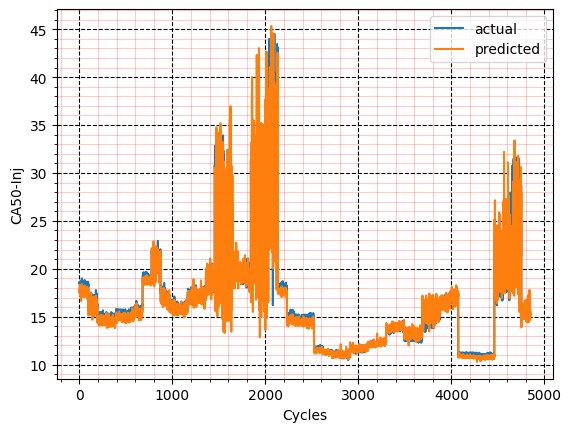

In [ ]:


plt.grid( which='major', color='k', linestyle='--')
plt.grid(which='minor', color='r', linestyle='-', alpha=0.2)
plt.plot(YDatatest.values)
plt.plot(y_pred)
plt.minorticks_on()
plt.xlabel("Cycles")
plt.ylabel("CA50-Inj")
plt.legend(['actual','predicted'])



RMSE for samples 1-97: 0.7977936854682628
RMSE for samples 98-194: 0.3695687301613067
RMSE for samples 195-291: 0.415313990063969
RMSE for samples 292-388: 0.4219295928673975
RMSE for samples 389-485: 0.36794033959517225
RMSE for samples 486-582: 0.34417185581050985
RMSE for samples 583-679: 0.32529131361239544
RMSE for samples 680-776: 0.47763596962300564
RMSE for samples 777-873: 1.3189718133510377
RMSE for samples 874-970: 0.3218785695739428
RMSE for samples 971-1067: 0.24019136185758208
RMSE for samples 1068-1164: 0.25371588978742043
RMSE for samples 1165-1261: 0.329205637049073
RMSE for samples 1262-1358: 0.3225895528331097
RMSE for samples 1359-1455: 0.34098053309555043
RMSE for samples 1456-1552: 9.623963327774465
RMSE for samples 1553-1649: 6.244430987949145
RMSE for samples 1650-1746: 0.7001012952498182
RMSE for samples 1747-1843: 0.46151440589659015
RMSE for samples 1844-1940: 6.345053250419699
RMSE for samples 1941-2037: 6.402410198727628
RMSE for samples 2038-2134: 6.654837

Text(0, 0.5, 'RMSE(deg)')

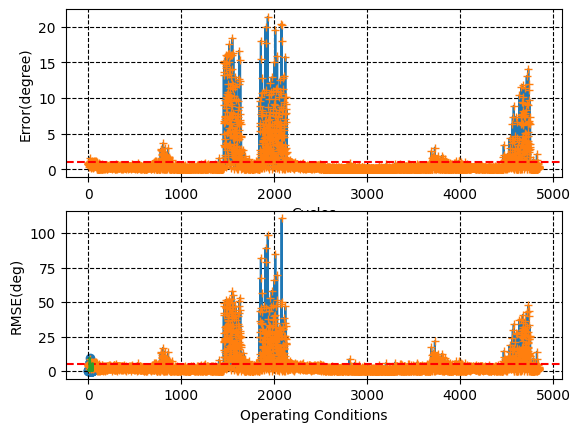

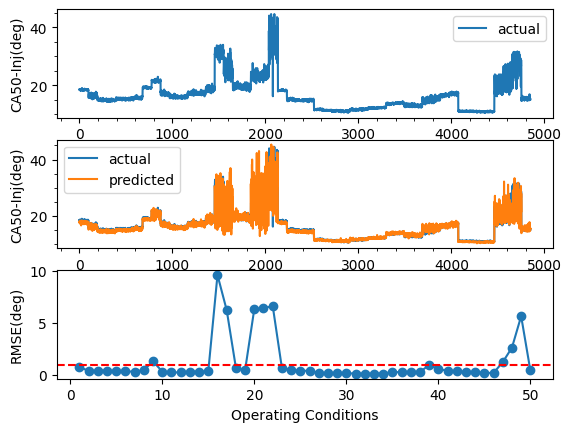

In [ ]:





plt.subplot(2,1,1)
plt.grid( which='major', color='k', linestyle='--')
plt.grid(which='minor', color='r', linestyle='-', alpha=0.2)
plt.plot((np.abs(YDatatest.values - y_pred.flatten())))
plt.plot((np.abs(YDatatest.values - y_pred.flatten())),'+')
plt.axhline(y=1, color='red', linestyle='--', label='y=5')

plt.ylabel("Error(degree)")
plt.xlabel("Cycles")

plt.subplot(2,1,2)
plt.grid( which='major', color='k', linestyle='--')
plt.grid(which='minor', color='r', linestyle='-', alpha=0.2)
plt.plot((np.abs(YDatatest.values - y_pred.flatten()))*100/np.abs(YDatatest.values))
plt.plot((np.abs(YDatatest.values - y_pred.flatten()))*100/np.abs(YDatatest.values),'+')
plt.axhline(y=5, color='red', linestyle='--', label='y=5')

plt.ylabel("Error %")
plt.xlabel("Cycles")


# Calculate RMSE for every 9 samples
window_size = 97
window_size2 = len(XData3test)/97

rmse_list = []

for i in range(0, len(y_pred), window_size):
    # Extract a window of 9 samples
    window = y_pred[i:i + window_size]
    value =  YDatatest[i:i + window_size]
    # Calculate the RMSE for the window
    rmse = sqrt(mean_squared_error(window,value))
    rmse_list.append(rmse)

# Print the RMSE values for each window
for i, rmse in enumerate(rmse_list):
    print(f"RMSE for samples {i * window_size + 1}-{(i + 1) * window_size}: {rmse}")
plt.plot(np.arange(1,window_size2+1),rmse_list)
plt.scatter(np.arange(1,window_size2+1),rmse_list)

plt.xlabel("Operating Conditions")
plt.ylabel("RMSE(deg)")

plt.figure()

plt.subplot(3,1,1)
plt.plot(YDatatest)
plt.minorticks_on()
plt.xlabel("Cycles")
plt.ylabel("CA50-Inj(deg)")
plt.legend(['actual'])


plt.subplot(3,1,2)
plt.plot(YDatatest)
plt.plot(y_pred)
plt.minorticks_on()
plt.xlabel("Cycles")
plt.ylabel("CA50-Inj(deg)")
plt.legend(['actual','predicted'])


plt.subplot(3,1,3)
plt.plot(np.arange(1,window_size2+1),rmse_list)
plt.scatter(np.arange(1,window_size2+1),rmse_list)
plt.axhline(y=1, color='red', linestyle='--', label='y=5')

plt.xlabel("Operating Conditions")
plt.ylabel("RMSE(deg)")
